# Proyek Analisis Data: Bike Sharing Dataset
- **Nama: Reni Uswatun Hasanah**
- **Email: reniuswatun06791@gmail.com**
- **ID Dicoding: reni_uswatun_hasanah**

## Menentukan Pertanyaan Bisnis

- Bagaimana pergerakan jumlah peminjaman sepeda berubah seiring waktu?

- Bagaimana pengaruh cuaca dan suhu (temp, atemp) terhadap jumlah peminjaman sepeda di setiap jam pada hari kerja dan hari libur?

- Apakah terdapat pola musiman yang signifikan dalam peminjaman sepeda?

- Apakah terdapat hubungan antara total sepeda (casual dan registered) dan perubahan jenis pengguna (casual dn registered) seiring waktu?

## Import Semua Packages/Library yang Digunakan
Library yang digunakan pada analisis ini adalah pandas untuk membuat dataframe dari bentuk .csv. Lalu ada numpy untuk mengolah data dalam bentuk array. setelahnya ada matplotlib.pyplot untuk membuat plot dengan seaborn untuk memperindah plot. yang terakhir adalah warning agar output yang dikeluarkan tidak mengeluarkan peringatan warning.

In [309]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data
Tahap ini untuk mengimport data dari format .csv ke bentuk dataframe menggunakan library pandas.

In [310]:
hour_df = pd.read_csv("data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.26,0.60,0.16,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.26,0.60,0.16,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.26,0.60,0.16,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.27,0.56,0.13,13,48,61


**Insight:**
- Mencoba melihat data perjam dan perhari serta perbedaannya
- Apa yang bis dilakukan untuk combine data tersebut

### Assessing Data
Tahap ini dilakukan untuk melihat apakah terdapat missing value lalu melihat column dan tipe datanya.

In [311]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tahap ini dilakukan untuk memastikan apakah ada data yang null, lalu dijumlahkan tiap column.

In [312]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tahapan untuk melihat data duplikat.

In [313]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tahap ini untuk melihat lebih jelas karakteristik dari masing-masing variabel.

In [314]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.00,NaN,2.50,0.50,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,NaN,1.11,0.50,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,NaN,2.00,0.00,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,NaN,3.00,1.00,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,NaN,3.00,1.00,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00


**Insight:**
- didapatkan tidak ada column yang nilainya bernilai null
- didapatkan tidak ada duplikasi data
- namun dteday dan hr diubah bentuk

### Cleaning Data
Tahap ini bertujuan untuk mengubah tipe variabel dari dteday dari object ke datetime, karena variabel tersebut adalah variabel time series. Serta menggabungkan date dan hour.

In [315]:
df_time = hour_df.copy()

In [316]:
df_time['dteday'] = pd.to_datetime(df_time['dteday'])
df_time['hr'] = pd.to_timedelta(df_time['hr'], unit='h')
df_time['hr'] = df_time['hr'].dt.total_seconds().apply(lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}")
df_time.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  object        
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- merubah tipe data dteday
- merubah hr

## Exploratory Data Analysis (EDA)

### Pengaruh hari hari tertentu serta jam tertentu dalam jumlah peminjaman sepeda
Tahap ini dilakukan untuk melihat apakah ada pengaruh dari hari-hari tertentu setra jam tertentu terhadap jumlah peminjaman rental sepeda. dan terlihat pada output dapat diasumsikan bahwa peminjaman sepeda akan tinggi di hari-hari kerja dan bukan weeekend maupun tanggal merah. Serta, jam sibuk atau bukan.

In [317]:

df = df_time.copy()
# Melakukan mapping untuk setiap variabel kategorikal
df['holiday'] = df['holiday'].map({0: 'Tidak', 1: 'Ya'})
df['weekday'] = df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
df['workingday'] = df['workingday'].map({0: 'Tidak', 1: 'Ya'})

# Membuat pivot tabel dengan hour 
pivot_hour_weekday = df.groupby('hr').agg({'cnt': 'mean'}).reset_index()
# Membuat pivot tabel untuk hari
pivot_weekday = df.groupby(by=["weekday"]).agg({
    "cnt": "mean"
}).reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']).reset_index()
# Membuat pivot table combine
pivot_combined = df.groupby(['weekday', 'hr']).agg({'cnt': 'mean'}).reset_index()
# Pivot tabel untuk hari libur dan kerja
pivot_holiday = df.groupby('holiday').agg({'cnt': 'mean'}).reset_index()
pivot_workingday = df.groupby('workingday').agg({
    "cnt": "mean"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_holiday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari :")
print(pivot_weekday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari kerja :")
print(pivot_workingday.to_string(index=False))
print("Rata-rata jumlah peminjaman sepeda perjam dan hari :")
print(pivot_combined.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
holiday    cnt
  Tidak 190.43
     Ya 156.87


Rata-rata jumlah peminjaman sepeda terhadap hari :
weekday    cnt
  Senin 183.74
 Selasa 191.24
   Rabu 191.13
  Kamis 196.44
  Jumat 196.14
  Sabtu 190.21
 Minggu 177.47


Rata-rata jumlah peminjaman sepeda terhadap hari kerja :
workingday    cnt
     Tidak 181.41
        Ya 193.21
Rata-rata jumlah peminjaman sepeda perjam dan hari :
weekday       hr    cnt
  Jumat 00:00:00  52.43
  Jumat 01:00:00  24.72
  Jumat 02:00:00  12.74
  Jumat 03:00:00   6.60
  Jumat 04:00:00   6.07
  Jumat 05:00:00  23.90
  Jumat 06:00:00  90.03
  Jumat 07:00:00 254.33
  Jumat 08:00:00 462.28
  Jumat 09:00:00 258.99
  Jumat 10:00:00 157.73
  Jumat 11:00:00 188.12
  Jumat 12:00:00 237.64
  Jumat 13:00:00 241.47
  Jumat 14:00:00 229.37
  Jumat 15:00:00 252.46
  Jumat 16:00:00 330.99
  Jumat 17:00:00 492.41
  Jumat 18:00:00 420.99
  Jumat 19:00:00 302.07
  Jumat 20:00:00 213.33
  Jumat 21:00:00 169.88
  Jumat

**Insight:**
- dapat melihat rata rat peminjaman sepeda
- melakukan pivoting

### Pengaruh cuaca dan suhu terhadap peminjaman sepeda disetiap hari
Tahap ini dilakukan untuk melihat apakah ada pengaruh dari cuaca ataupun suhu terhadap jumlah peminjaman rental sepeda. dan terlihat pada output dapat diasumsikan bahwa peminjaman sepeda akan tinggi di hari yang memiliki cuaca dan suhu yang baik.

In [318]:
df = df_time.copy()

# Pengaruh Suhu Rata-Rata Harian terhadap Peminjaman
pivot_daily_temp = df.groupby('dteday').agg({
    "temp": "mean",
    "atemp": "mean",
    "cnt": "mean"
}).reset_index()
# Pengaruh Suhu per Jam
pivot_hourly_temp = df.groupby('hr').agg({
    "temp": "mean",
    "atemp": "mean",
    "cnt": "mean"
}).reset_index()
# Pengaruh Suhu dan Hari dalam Seminggu:
pivot_weekday_temp = df.groupby(['weekday', 'hr']).agg({
    "temp": "mean",
    "atemp": "mean",
    "cnt": "mean"
}).reset_index()
# Gabungan Semua Variabel
pivot_combined_temp = df.groupby(['dteday', 'hr', 'temp', 'atemp']).agg({'cnt': 'mean'}).reset_index()

# Menampilkan pivot table dengan format yang lebih baik
pd.options.display.float_format = '{:.2f}'.format

print("Rata-rata suhu, suhu terasa, dan jumlah peminjaman per hari:")
print(pivot_daily_temp.to_string(index=False))

print("\n===============================================\n")

print("Rata-rata suhu, suhu terasa, dan jumlah peminjaman per jam dan hari:")
print(pivot_hourly_temp.to_string(index=False))

print("\n===============================================\n")

print("Rata-rata suhu, suhu terasa, dan jumlah peminjaman per hari dalam seminggu dan jam:")
print(pivot_weekday_temp.to_string(index=False))

print("\n===============================================\n")

print("Rata-rata jumlah peminjaman untuk setiap kombinasi tanggal, jam, suhu, dan suhu terasa:")
print(pivot_combined_temp.to_string(index=False))

Rata-rata suhu, suhu terasa, dan jumlah peminjaman per hari:
    dteday  temp  atemp    cnt
2011-01-01  0.34   0.36  41.04
2011-01-02  0.36   0.35  34.83
2011-01-03  0.20   0.19  61.32
2011-01-04  0.20   0.21  67.91
2011-01-05  0.23   0.23  69.57
2011-01-06  0.20   0.23  69.83
2011-01-07  0.20   0.21  65.65
2011-01-08  0.17   0.16  39.96
2011-01-09  0.14   0.12  34.25
2011-01-10  0.15   0.15  55.04
2011-01-11  0.17   0.19  57.41
2011-01-12  0.17   0.16  52.82
2011-01-13  0.17   0.15  58.58
2011-01-14  0.16   0.19  61.78
2011-01-15  0.23   0.25  52.00
2011-01-16  0.23   0.23  50.17
2011-01-17  0.18   0.18  41.67
2011-01-18  0.22   0.23  56.92
2011-01-19  0.29   0.30  71.74
2011-01-20  0.26   0.26  80.29
2011-01-21  0.18   0.16  64.29
2011-01-22  0.06   0.08  42.65
2011-01-23  0.10   0.10  42.87
2011-01-24  0.10   0.12  61.57
2011-01-25  0.22   0.23  86.30
2011-01-26  0.22   0.20  31.62
2011-01-27  0.20   0.22  53.88
2011-01-28  0.20   0.22  50.74
2011-01-29  0.20   0.21  47.74
2011-01-3

### Pengaruh cuaca dan musim terhadap jumlah peminjaman
Tahap ini dilakukan untuk menganalisis apakah cuaca atau musim mempengaruhi jumlah peminjaman sepeda. Dari output yang diperoleh, dapat disimpulkan bahwa peminjaman sepeda cenderung meningkat pada hari-hari dengan cuaca baik dan tidak begitu tinggi pada musim semi.

In [319]:
# Meng-copy DataFrame
df = df_time.copy()

# Melakukan mapping untuk setiap variabel kategorikal dengan cara yang lebih ringkas
mapping_weathersit = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
mapping_season = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}

df['weathersit'] = df['weathersit'].map(mapping_weathersit)
df['season'] = df['season'].map(mapping_season)

# Mengatur urutan kelas
weathersit_order = ['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat']
season_order = ['Semi', 'Panas', 'Gugur', 'Dingin']

# Membuat pivot tabel untuk rata-rata jumlah peminjaman sepeda terhadap variabel cuaca dan musim
pivot_weathersit = df.groupby('weathersit')['cnt'].mean().reindex(weathersit_order, fill_value=0).reset_index()
pivot_season = df.groupby('season')['cnt'].mean().reindex(season_order, fill_value=0).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap keadaan cuaca :")
print(pivot_weathersit.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap musim :")
print(pivot_season.to_string(index=False))


Rata-rata jumlah peminjaman sepeda terhadap keadaan cuaca :
  weathersit    cnt
       Cerah 204.87
    Berkabut 175.17
Hujan Ringan 111.58
 Hujan Lebat  74.33


Rata-rata jumlah peminjaman sepeda terhadap musim :
season    cnt
  Semi 111.11
 Panas 208.34
 Gugur 236.02
Dingin 198.87


### Perbandingan rata-rata dari pengguna biasa dan terdaftar
Tahap ini dilakukan untuk mengevaluasi apakah terdapat perbedaan dalam rata-rata jumlah peminjam sepeda biasa dan peminjam terdaftar setiap harinya. Dari output yang diperoleh, dapat disimpulkan bahwa pengguna yang terdaftar cenderung meminjam sepeda lebih banyak dibandingkan dengan peminjam biasa.

In [320]:
# Meng-copy DataFrame
df = df_time.copy()

# Menghitung rata-rata untuk pengguna biasa dan terdaftar dengan method groupby
avg_counts = df[['casual', 'registered']].mean().reset_index()
avg_counts.columns = ['Variabel', 'Rata-rata']  # Mengubah nama kolom

# Menghitung rata-rata untuk pengguna biasa dan terdaftar per jam
avg_hourly = df.groupby('hr')[['casual', 'registered']].mean().reset_index()
avg_hourly = avg_hourly.melt(id_vars='hr', var_name='Tipe Pengguna', value_name='Rata-rata')

# Menghitung rata-rata untuk pengguna biasa dan terdaftar per hari
avg_daily = df.groupby('dteday')[['casual', 'registered']].mean().reset_index()
avg_daily = avg_daily.melt(id_vars='dteday', var_name='Tipe Pengguna', value_name='Rata-rata')

# Menampilkan pivot tabel
print("Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari pengguna biasa dan terdaftar:")
print(avg_counts.to_string(index=False))
print("Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari pengguna biasa dan terdaftar per hari:")
print(avg_daily.to_string(index=False))
print("Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari pengguna biasa dan terdaftar per jam:")
print(avg_hourly.to_string(index=False))

Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari pengguna biasa dan terdaftar:
  Variabel  Rata-rata
    casual      35.68
registered     153.79
Pivot Tabel untuk rata-rata jumlah peminjaman sepeda dari pengguna biasa dan terdaftar per hari:
    dteday Tipe Pengguna  Rata-rata
2011-01-01        casual      13.79
2011-01-02        casual       5.70
2011-01-03        casual       5.45
2011-01-04        casual       4.70
2011-01-05        casual       3.57
2011-01-06        casual       3.83
2011-01-07        casual       6.43
2011-01-08        casual       2.83
2011-01-09        casual       2.25
2011-01-10        casual       1.71
2011-01-11        casual       1.95
2011-01-12        casual       1.14
2011-01-13        casual       1.58
2011-01-14        casual       2.35
2011-01-15        casual       9.25
2011-01-16        casual      10.46
2011-01-17        casual       4.88
2011-01-18        casual       0.75
2011-01-19        casual       3.39
2011-01-20        casual     

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pergerakan jumlah peminjaman sepeda berubah seiring waktu?

Dapat dilihat berdasarkan plot dibawah terdapat perbedaan seiring dengan hari dan jam. Maupun weekend dan weekday. dapat dilihat pula peminjaman sepeda banyak di jam jam kerja

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3996\3632737711.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='hr', y='cnt', data=pivot_hour_weekday, palette='pastel')


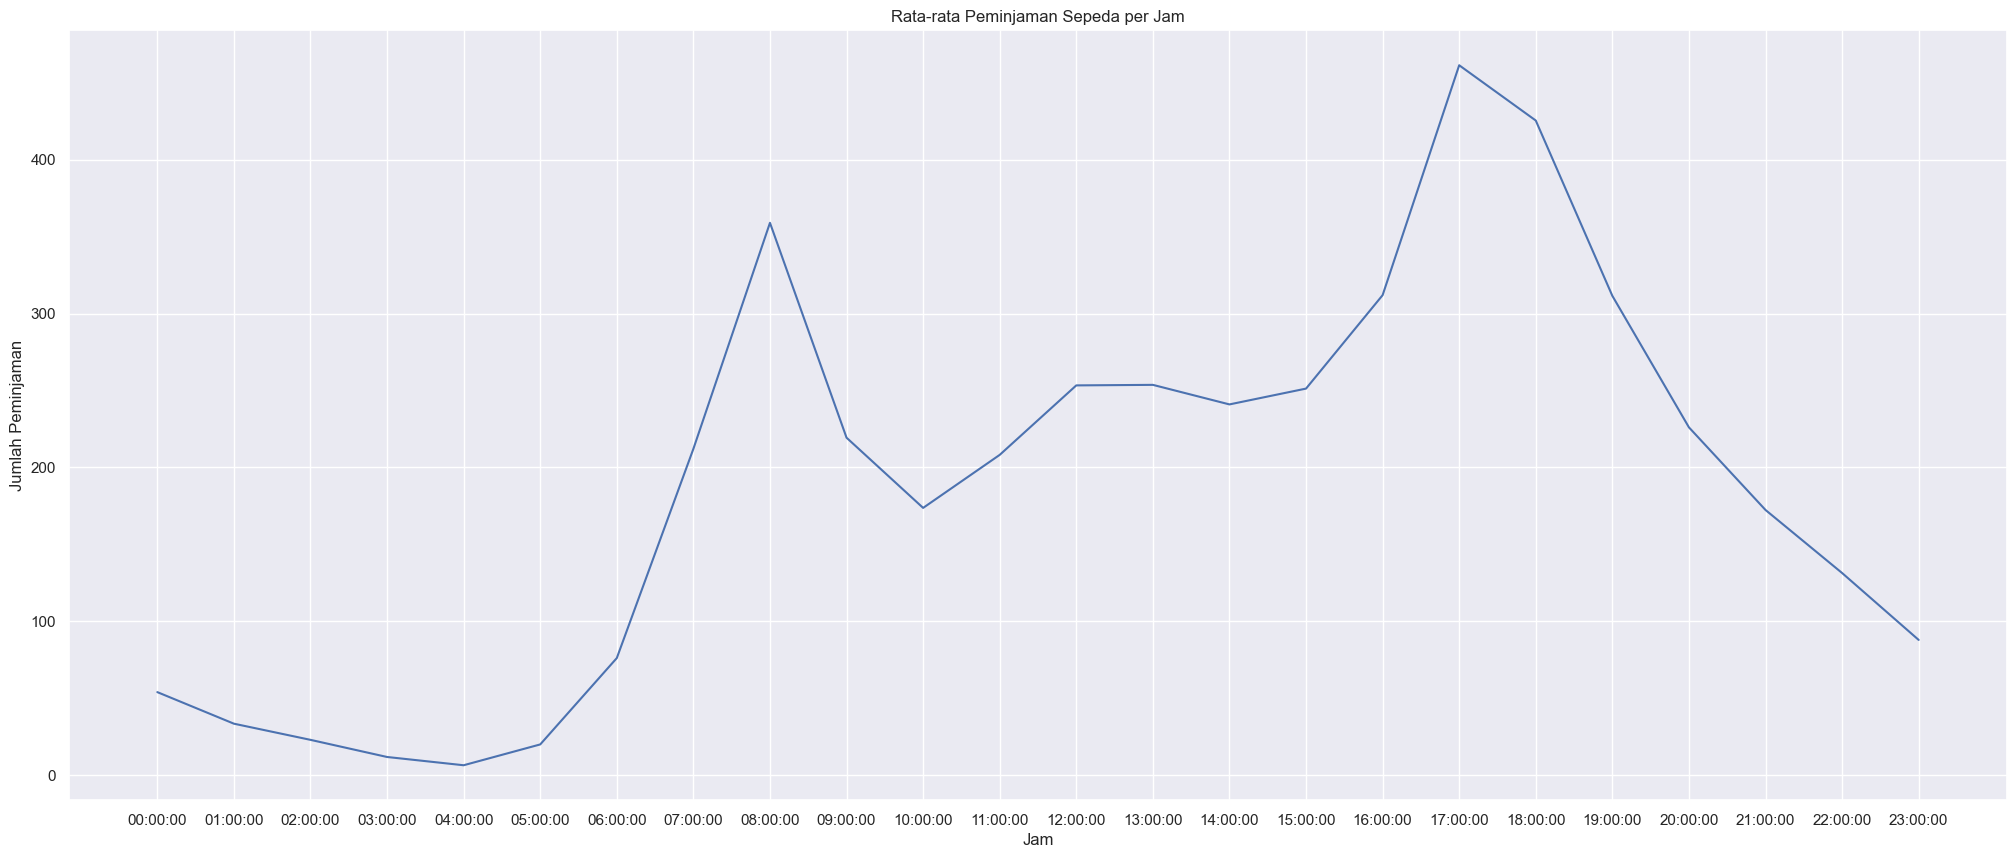

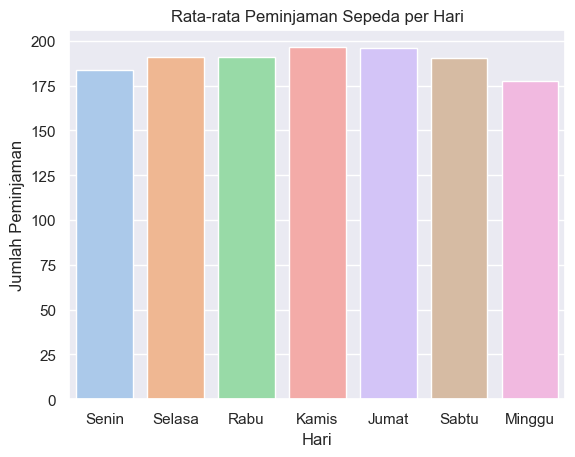

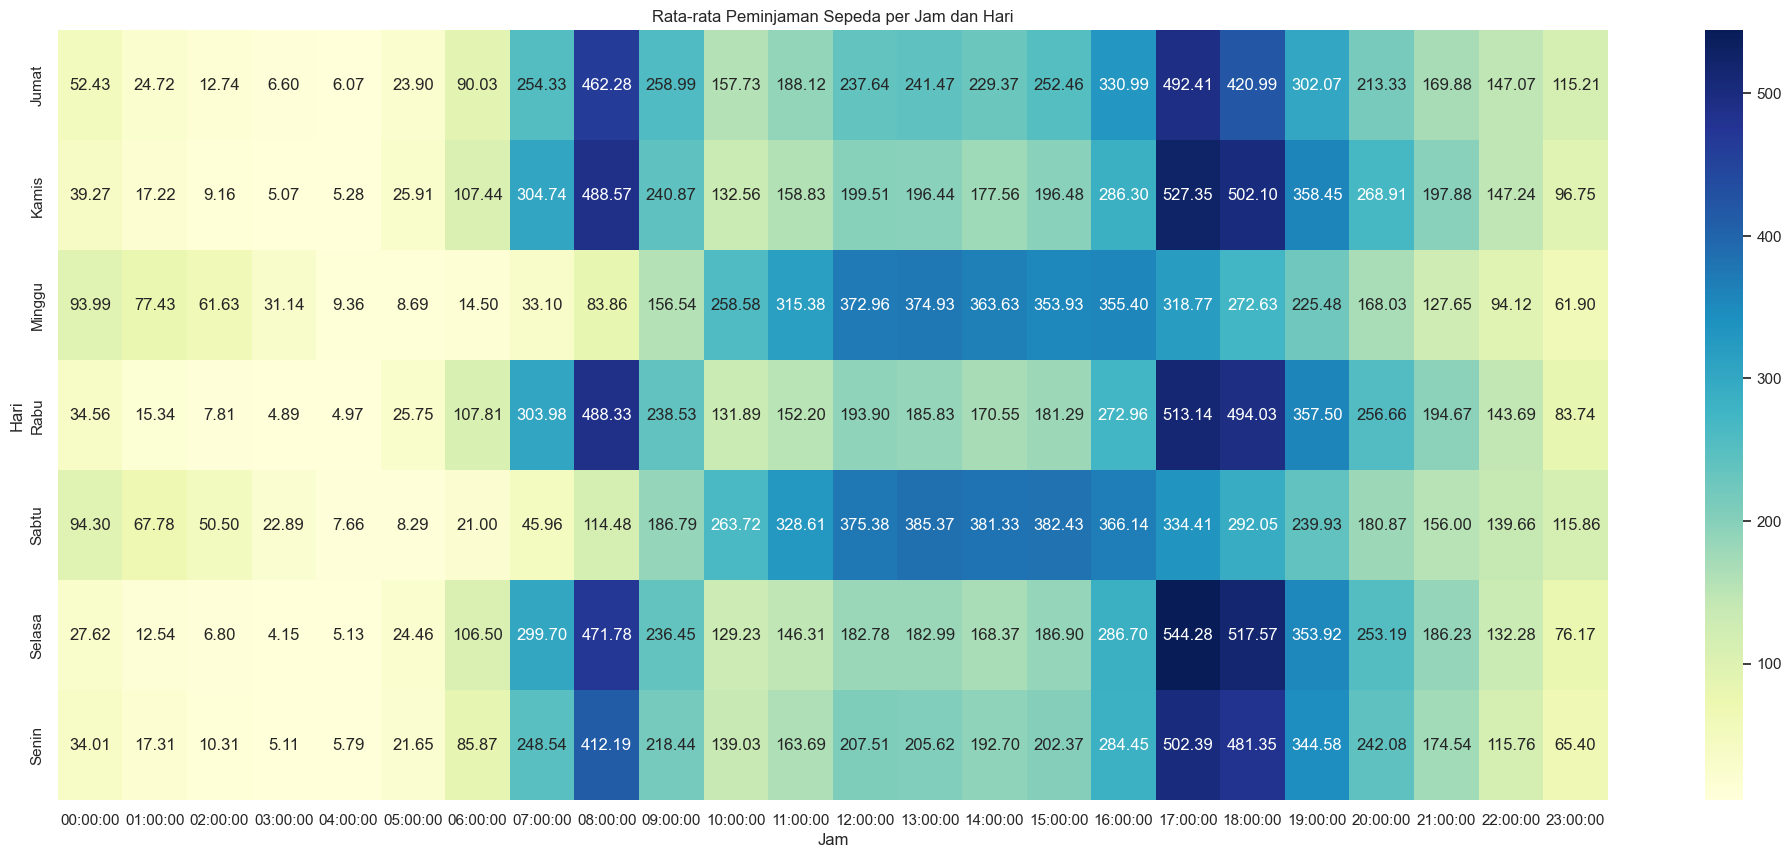

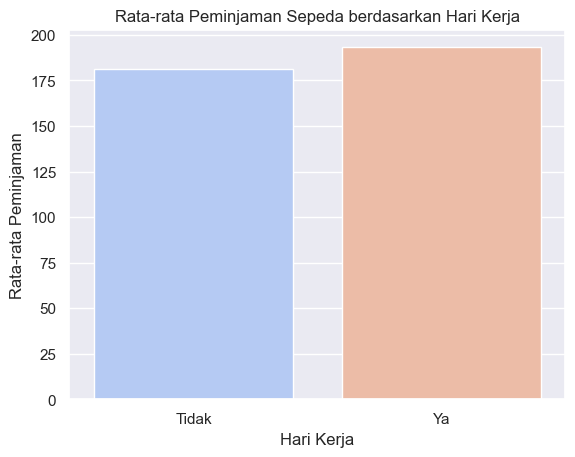

In [321]:
# Line plot untuk pivot_hour_weekday
plt.figure(figsize=(25, 10))
sns.lineplot(x='hr', y='cnt', data=pivot_hour_weekday, palette='pastel')
plt.title('Rata-rata Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Bar plot untuk pivot_weekday
sns.barplot(x='weekday', y='cnt', data=pivot_weekday, palette='pastel')
plt.title('Rata-rata Peminjaman Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Plot Rata-rata Peminjaman Sepeda per Jam dan Hari
plt.figure(figsize=(25, 10))
pivot_combined_pivot = pivot_combined.pivot(index='weekday', columns='hr', values='cnt')
sns.heatmap(pivot_combined_pivot, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Rata-rata Peminjaman Sepeda per Jam dan Hari')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()

# Plot Rata-rata Peminjaman Sepeda terhadap Hari Kerja
sns.barplot(x='workingday', y='cnt', data=pivot_workingday, palette='coolwarm')
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Peminjaman')
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca dan suhu (temp, atemp) terhadap jumlah peminjaman sepeda di setiap jam pada hari kerja dan hari libur?
Ternyata selain hari kerja suhu juglah berpengaruh.

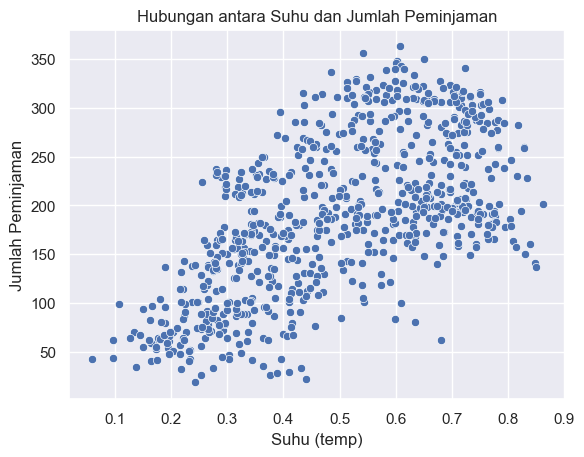

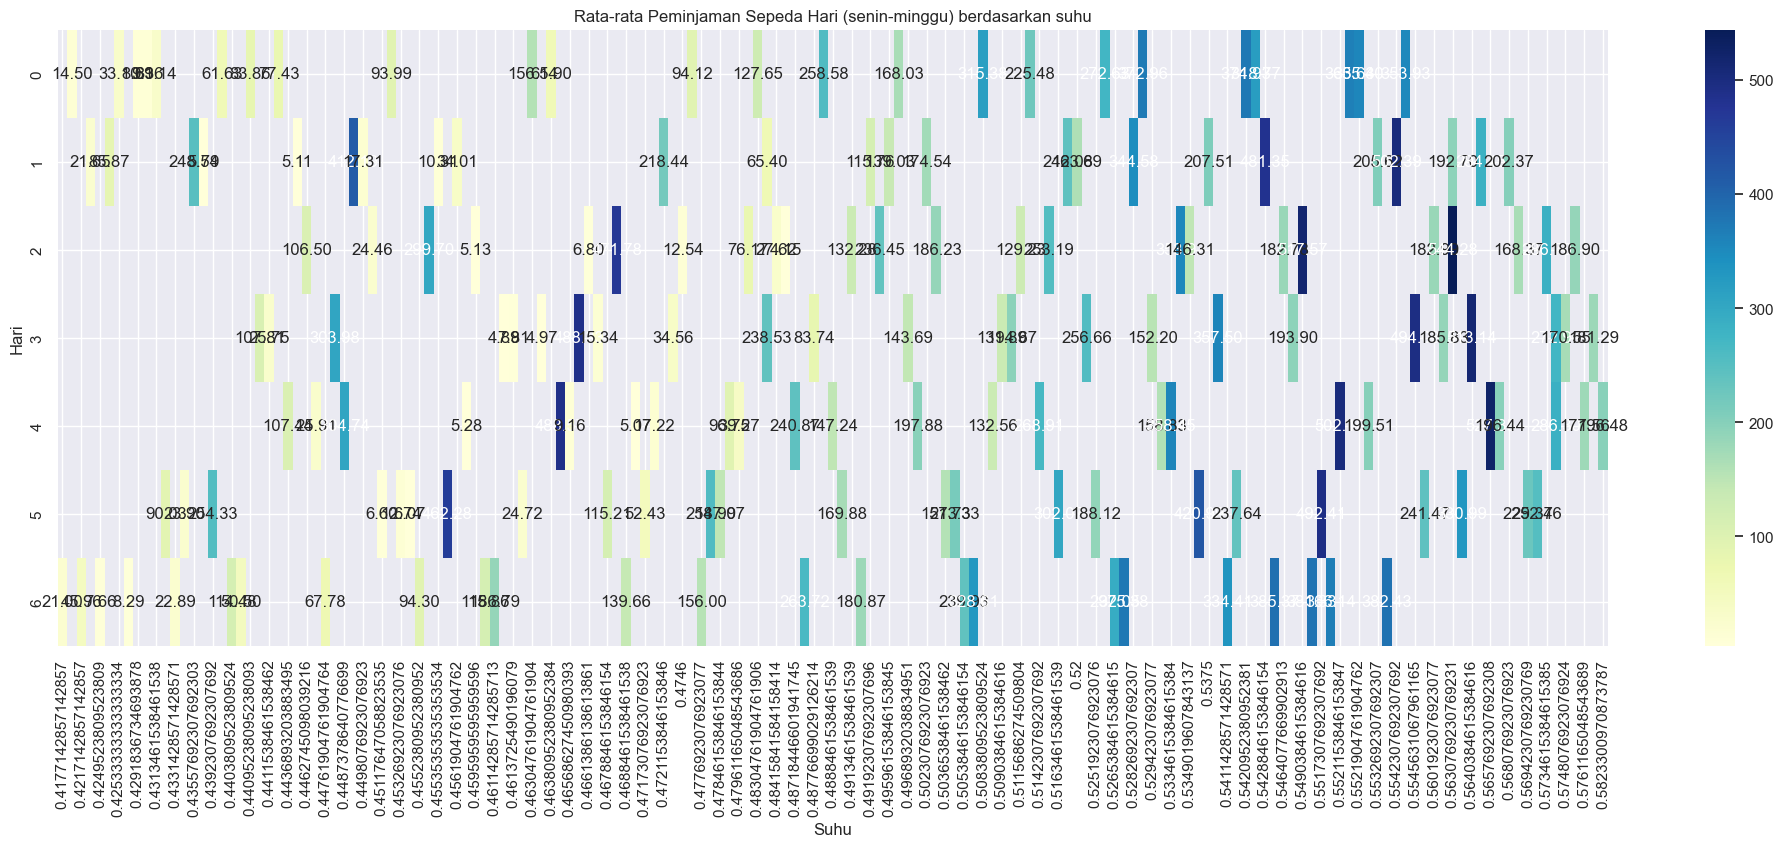

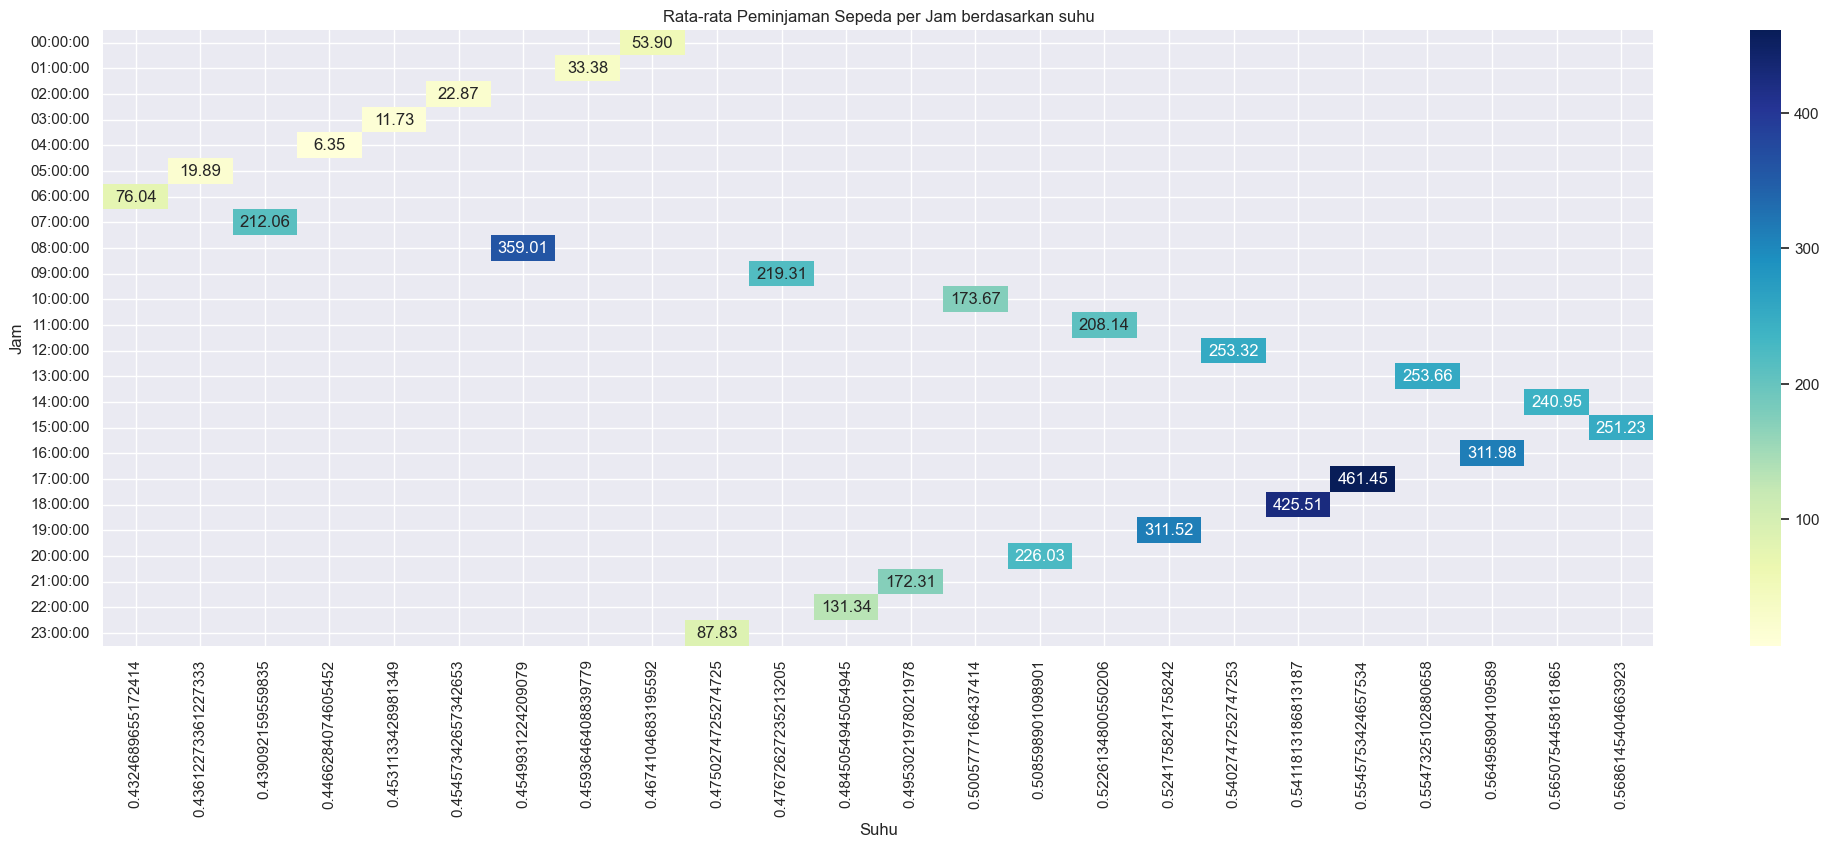

In [322]:

# Visualisasi hubungan antara suhu dan jumlah peminjaman
sns.scatterplot(x='temp', y='cnt', data=pivot_daily_temp)
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Plot Pengaruh Suhu Hari terhadap Peminjaman
plt.figure(figsize=(25, 8))
pivot_dteday_temp_cnt = pivot_weekday_temp.pivot(index='weekday', columns='temp', values='cnt')
sns.heatmap(pivot_dteday_temp_cnt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Rata-rata Peminjaman Sepeda Hari (senin-minggu) berdasarkan suhu')
plt.xlabel('Suhu')
plt.ylabel('Hari')
plt.show()

# Plot Pengaruh Suhu per Jam terhadap Peminjaman
plt.figure(figsize=(25, 8))
pivot_hr_temp_cnt = pivot_hourly_temp.pivot(index='hr', columns='temp', values='cnt')
sns.heatmap(pivot_hr_temp_cnt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Rata-rata Peminjaman Sepeda per Jam berdasarkan suhu')
plt.xlabel('Suhu')
plt.ylabel('Jam')
plt.show()


### Pertanyaan 3: Apakah terdapat pola musiman yang signifikan dalam peminjaman sepeda?
Bisa dilihat dari plot dibawah terdapat pola musiman pada peminjaman sepedan dan pola cuaca.

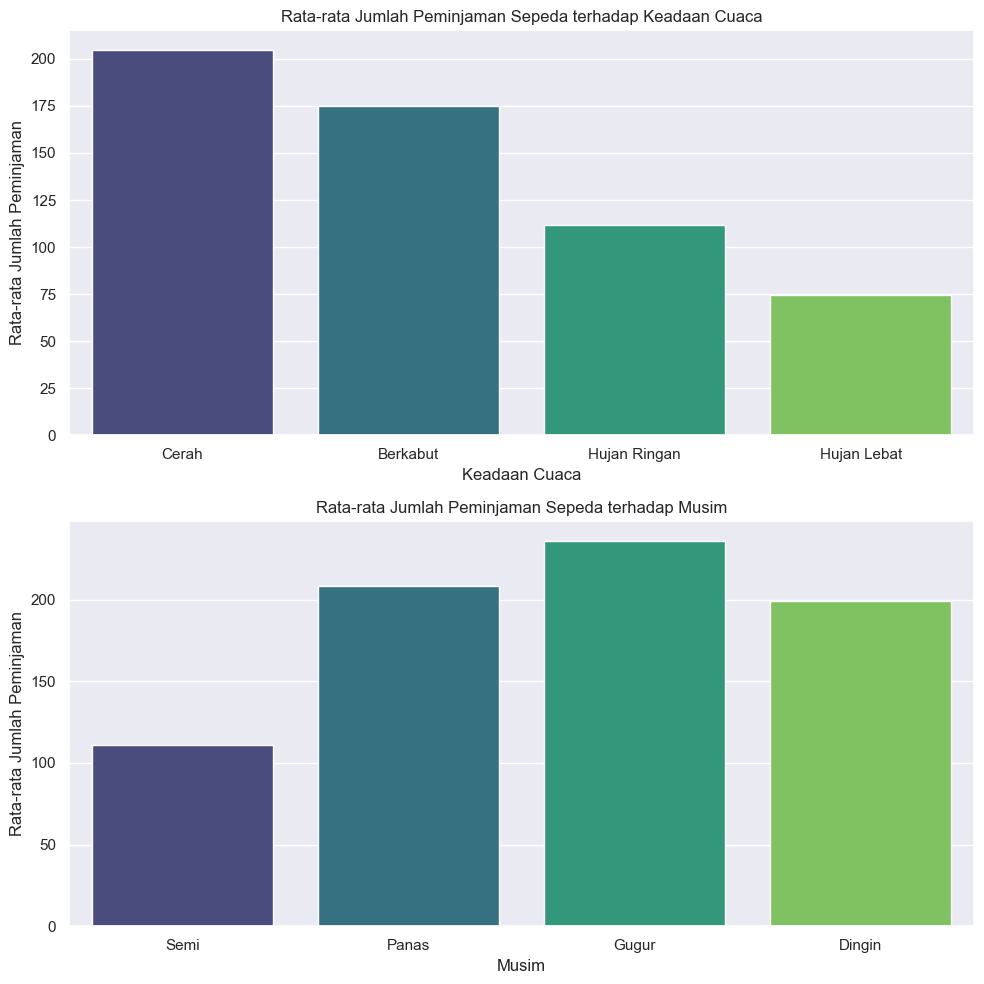

In [323]:
# Membuat figure dan subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# 1. Plot rata-rata peminjaman terhadap cuaca
sns.barplot(ax=axes[0], x='weathersit', y='cnt', data=pivot_weathersit, palette='viridis')
axes[0].set_title('Rata-rata Jumlah Peminjaman Sepeda terhadap Keadaan Cuaca')
axes[0].set_xlabel('Keadaan Cuaca')
axes[0].set_ylabel('Rata-rata Jumlah Peminjaman')

# 2. Plot rata-rata peminjaman terhadap musim
sns.barplot(ax=axes[1], x='season', y='cnt', data=pivot_season, palette='viridis')
axes[1].set_title('Rata-rata Jumlah Peminjaman Sepeda terhadap Musim')
axes[1].set_xlabel('Musim')
axes[1].set_ylabel('Rata-rata Jumlah Peminjaman')

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 4: Apakah terdapat hubungan antara total sepeda (casual dan registered) dan perubahan jenis pengguna (casual dn registered) seiring waktu?
Maka dapat dilihat penggunaan sepeda antara casual dan regiter di setiap jam dan hari.

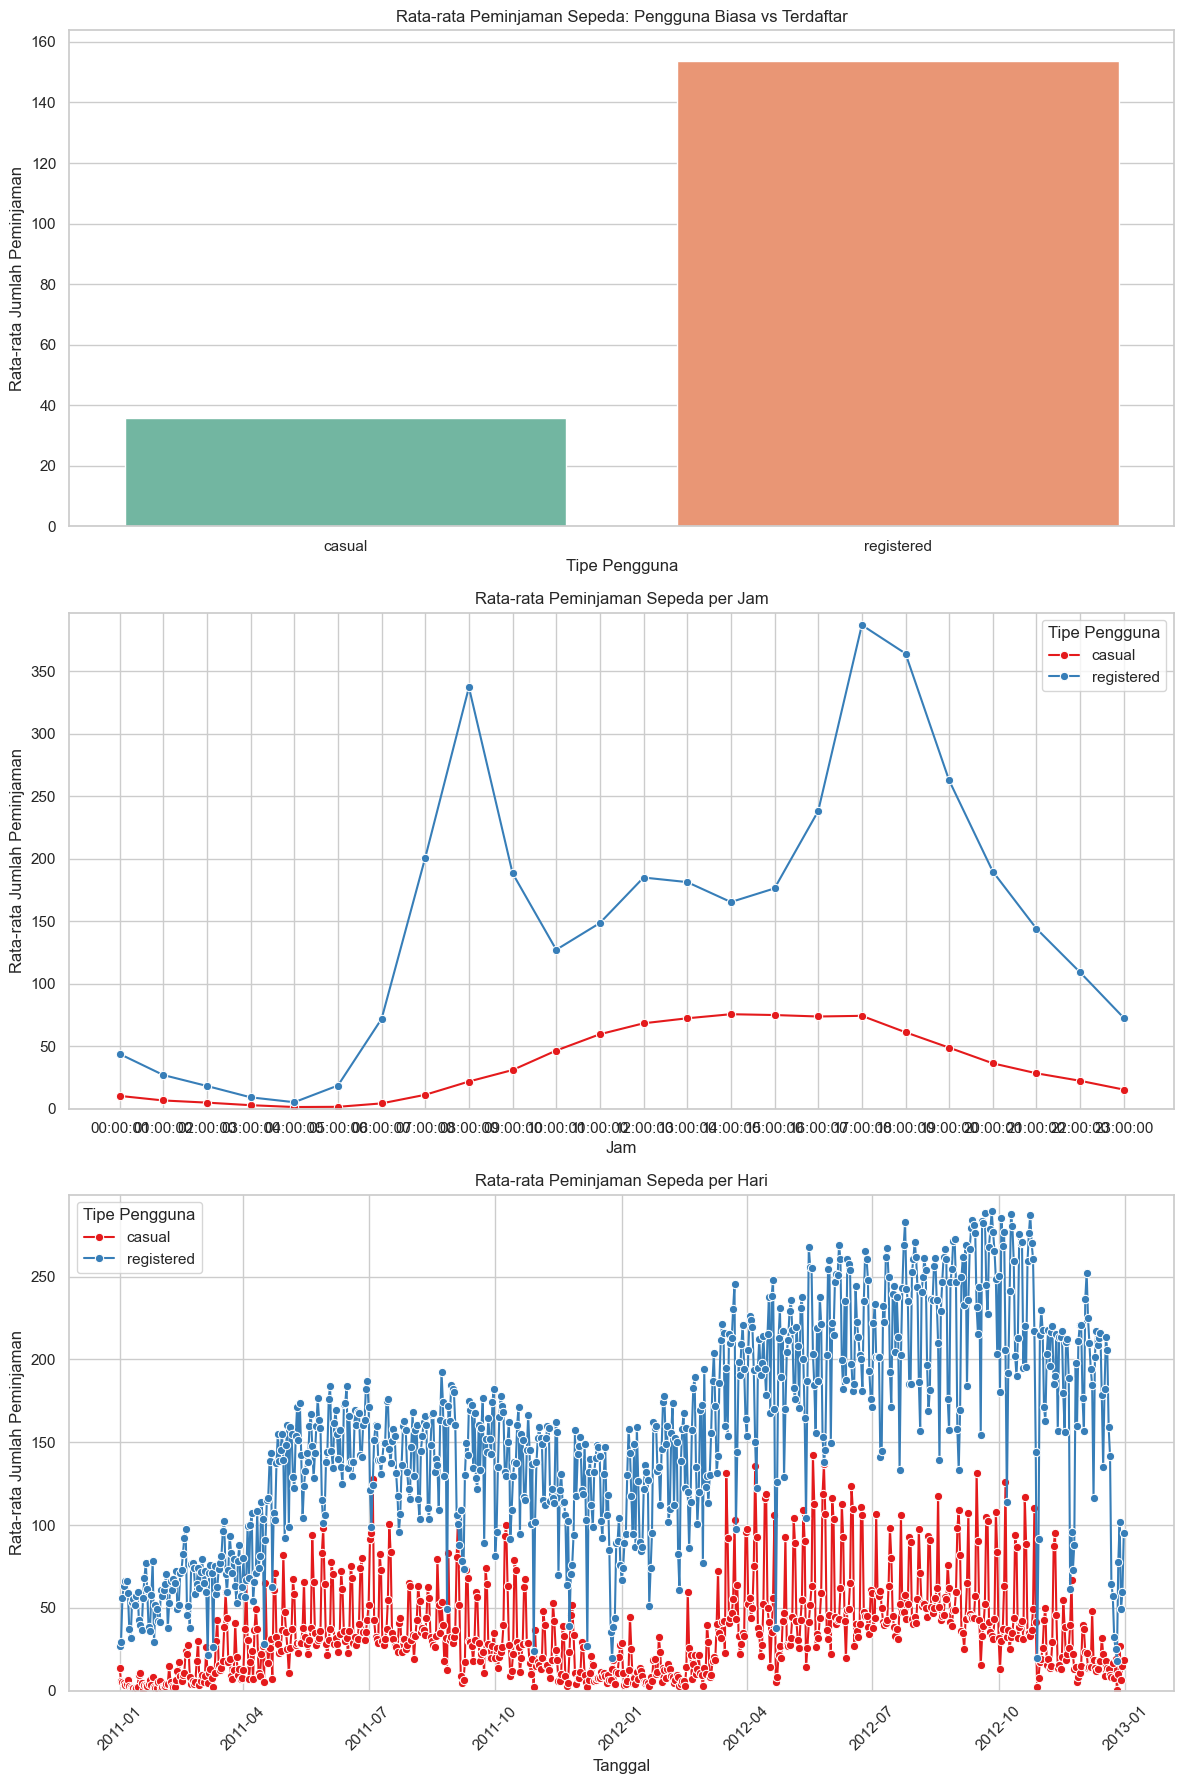

In [324]:
# Mengatur tema untuk seaborn
sns.set(style="whitegrid")

# Membuat figure dan subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Plot Rata-rata Peminjaman Secara Keseluruhan
avg_counts.columns = ['Tipe Pengguna', 'Rata-rata']
sns.barplot(ax=axes[0], x='Tipe Pengguna', y='Rata-rata', data=avg_counts, palette='Set2')
axes[0].set_title('Rata-rata Peminjaman Sepeda: Pengguna Biasa vs Terdaftar')
axes[0].set_ylabel('Rata-rata Jumlah Peminjaman')
axes[0].set_ylim(0, avg_counts['Rata-rata'].max() + 10)

# 2. Plot Rata-rata Peminjaman per Jam
sns.lineplot(ax=axes[1], x='hr', y='Rata-rata', hue='Tipe Pengguna', data=avg_hourly, palette='Set1', marker='o')
axes[1].set_title('Rata-rata Peminjaman Sepeda per Jam')
axes[1].set_xlabel('Jam')
axes[1].set_ylabel('Rata-rata Jumlah Peminjaman')
axes[1].legend(title='Tipe Pengguna')
axes[1].set_ylim(0, avg_hourly['Rata-rata'].max() + 10)

# 3. Plot Rata-rata Peminjaman per Hari
sns.lineplot(ax=axes[2], x='dteday', y='Rata-rata', hue='Tipe Pengguna', data=avg_daily, palette='Set1', marker='o')
axes[2].set_title('Rata-rata Peminjaman Sepeda per Hari')
axes[2].set_xlabel('Tanggal')
axes[2].set_ylabel('Rata-rata Jumlah Peminjaman')
axes[2].legend(title='Tipe Pengguna')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0, avg_daily['Rata-rata'].max() + 10)

# Menampilkan plot
plt.tight_layout()
plt.show()

## Conclusion

- **Conclution pertanyaan 1** : Bagaimana pergerakan jumlah peminjaman sepeda berubah seiring waktu?

Dapat dilihat pada plot diatas pada jam jam tertentu berangkat kerja dan pulang kerja, terjadi kenaikan peminjaman yang signifika. Dapat dilihat pada jam 07.00 - 08.00 terjadi kenaikan peminjaman sepeda hingga menyentuh rang 300-400, seta pada jam pulang kerja sekitar jam 16.00 - 18.00 terjadi kenaikkan yang luar biasa yaitu menyentuh range 400-500. Hal ini dapat menjadi analisis bahwa perusahaan dapat menambah jumlah sepeda dan lebih mempromosikan sepeda di jam jam berngkat kerja dan pulang kerja. Mengingat mungkin jam pulang kerja banyak yang sudah lelah jalan kaki dan lebih memilih menaiki sepeda. 

Lalu, pada hari dalam seminggu terjadi penonjakan peminjaman pada hari kamis dan jum'at. Lebih menarik lagi, pada hari hari libur peminjaman sepeda bukan naik di jam pagi dan sore tetapi di jam 10.00 - 16.00, oleh karena itu perusahan dapat melakukan promosi sepeda di jam itu ketika liburan.

- **Conclution pertanyaan 2** : Bagaimana pengaruh cuaca dan suhu (temp, atemp) terhadap jumlah peminjaman sepeda di setiap jam pada hari kerja dan hari libur?

Suhu yang nyaman berada di jam menjelang sore, oleh karena itu kenapa banyak yang menggunakan sepeda.

- **Conclution pertanyaan 3** : Apakah terdapat pola musiman yang signifikan dalam peminjaman sepeda?

Rata-rata pengguna casual dan pengguna registered cenderung melakukan transaksi peminjaman sepeda ketika cuaca sedang cerah, kemudian diikuti dengan cuaca berkabut/berawan, dan hujan ringan. Tidak pernah ada transaksi peminjaman sepeda ketika cuaca sedang hujan lebat/badai. Lalu, banyak pengguna menggunakan sepeda di musi gugur.

- **Conclution pertanyaan 4** : Apakah terdapat hubungan antara total sepeda (casual dan registered) dan perubahan jenis pengguna (casual dn registered) seiring waktu?

Rata-rata pengguna registered lebih banyak dibandingkan penggunaan kasual. hal ini dapat mendorong lebih lagi untuk menambah keuntungan pengguna register agar nantinya pengguna register bisa lebih banyak lagi dapat berlayanan setiap hari.
